# Superstore Sales Data Analysis
 **Short Discription of the dataset and project Goal** 

 
This notebook provides a comprehensive analysis of the Superstore sales dataset, focusing on data cleaning, feature engineering, statistical analysis, and visualizations to uncover insights into sales performance across different dimensions.

## Exploratory Data Analysis (EDA)

### Step 1. Data Loading

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
# Load the dataset
data = pd.read_csv('./dataset/superstore_sales.csv', encoding='latin1')

### Step 2. Data Overview

In [17]:
# Display the first few rows of the dataset
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Display the shape of the dataset
data.shape

(9994, 21)

* There are `9994` rows and `21` columns in the dataset.

In [4]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### Step 3. Data Cleaning

In [5]:
# Convert 'Order Date' and 'Ship Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [6]:
# Let's check the format of the date columns
data[['Order Date', 'Ship Date']].dtypes

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

* Order Date and Ship Date columns have been converted to datetime format.

In [7]:
# Check the missing values in the dataset
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

* There are no missing values in the dataset.

In [8]:
# Check for duplicated rows
data.duplicated().sum(axis=0)

0

* There are no duplicated rows in the dataset. 

### Step 4. Feature Engineering

Leat's Create new three columns for analysis, 'Order Year', 'Order Month', and 'Order Day' from the 'Order Date' column.

In [9]:
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Day'] = data['Order Date'].dt.day

In [10]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11


### Step 5. Statistical Analysis (Descriptive Statistics)

In [15]:
# Let's keep an eye on the statistical analysis
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686,15.468481
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,1.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000,5.000000,8.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000,9.000000,15.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000,11.000000,23.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,31.000000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654,8.748327


### Step 6. Visual Analysis

#### 1: Monthly Sales Trend Analysis
We will analyze the monthly sales trend to identify peak sales periods and seasonal patterns.

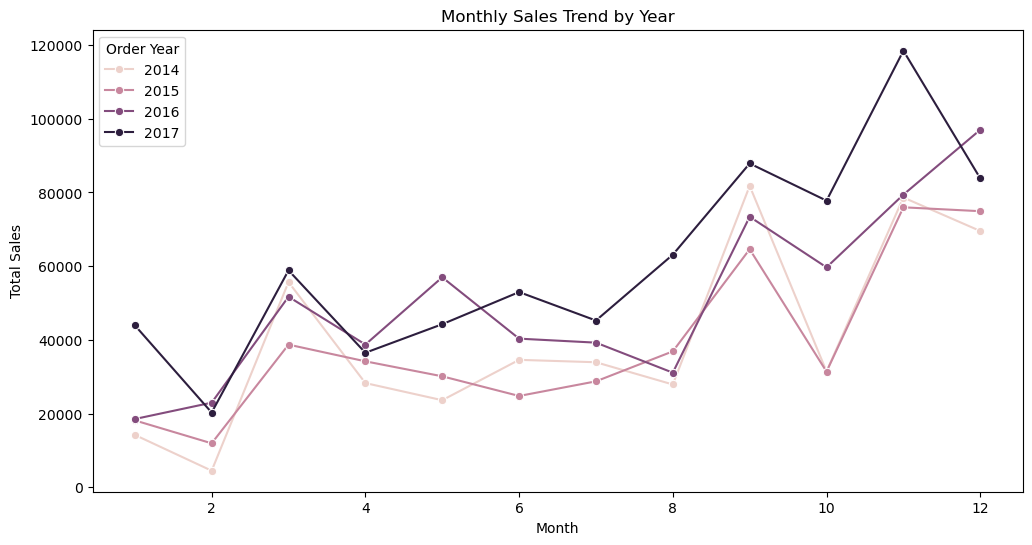

In [11]:
# Group sales by year and month
monthly_sales = data.groupby(['Order Year' , 'Order Month'])['Sales'].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Order Month', y='Sales', hue='Order Year', marker='o')
plt.title("Monthly Sales Trend by Year")
plt.xlabel("Month")
plt.ylabel("Total Sales")
# plt.legend(title='Year')  It do the same as hue
plt.show()

* The year 2017 shows the highest sales, with a significant peak in November and December, likely due to holiday shopping.

#### 2: Sales by Category 
Top Categories by Sales

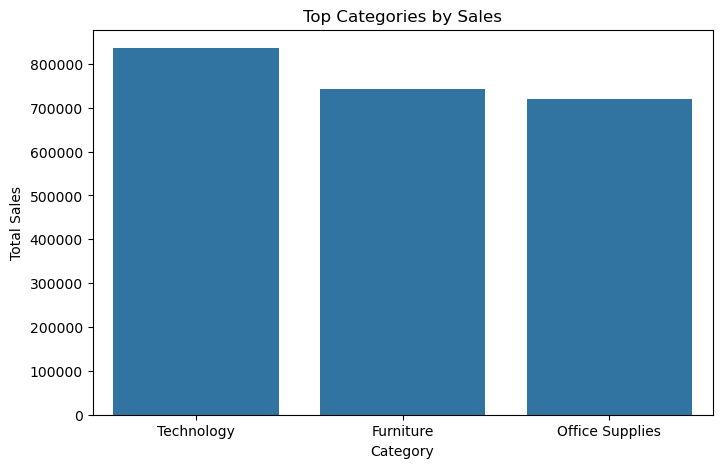

In [12]:
top_categories = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plot top 5 categories by sales
plt.figure(figsize=(8,5))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title("Top Categories by Sales")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

* Now we analyze the sub-categories within the top categories to identify which specific products are driving sales.

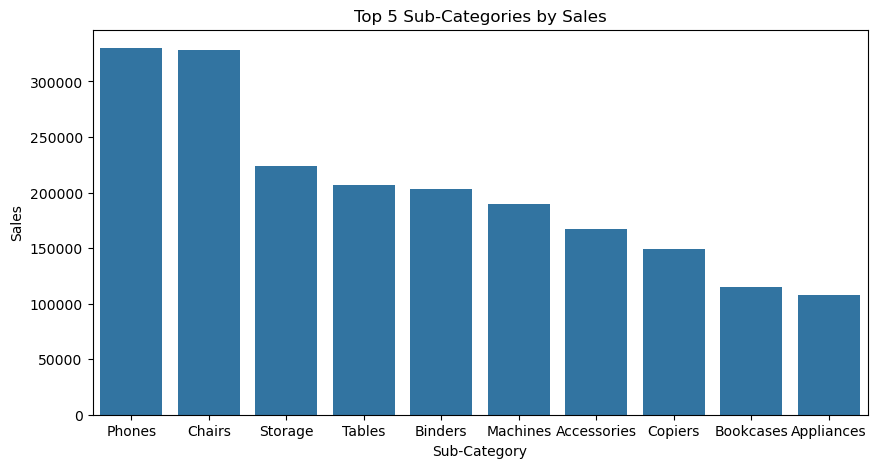

In [13]:
top_subcategories = data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_subcategories.index, y=top_subcategories.values)
plt.title('Top 5 Sub-Categories by Sales')
plt.ylabel('Sales')
plt.show()


* There are significant variations in sales among sub-categories within each top category, indicating that certain products are more popular than others. Phones and Chairs are leading in their respective categories.
Storage, Tables, and Binders, Machines also show strong sales performance. Other sub -categories have lower sales, suggesting potential areas for growth or re-evaluation.

#### 3: Region-wise Profit Analysis
We will analyze profit across different regions to identify high-performing and low-performing areas.

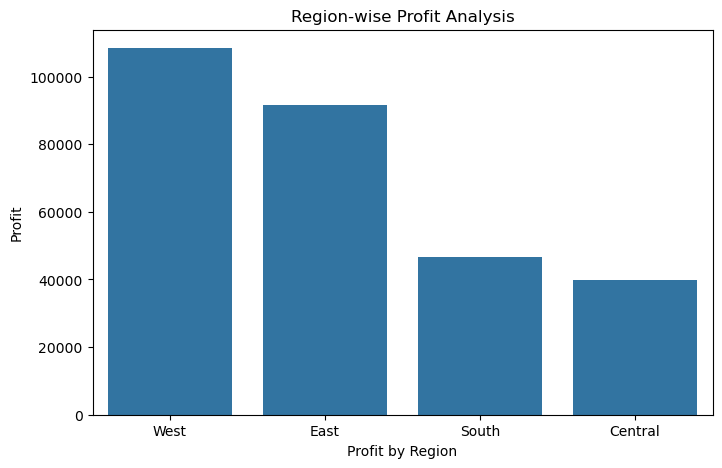

In [14]:
region_profit = data.groupby('Region')['Profit'].sum().sort_values(ascending=False)

# Plot region-wise profi
plt.figure(figsize=(8,5))
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title("Region-wise Profit Analysis")
plt.xlabel("Profit by Region")
plt.ylabel("Profit")
plt.show()

* West region shows the highest profit, while the Central region has the lowest profit, indicating potential areas for improvement.

## Key Insights and Recommendations
* Peak months drive sales: Monthly sales trend shows November and December have the highest sales. Focus marketing and promotions during these months to maximize revenue.

* High-performing categories: Technology and Office Supplies are the top-performing categories. Prioritize inventory and promotional efforts for these categories.

* Sub-category insights: Certain sub-categories like Phones, Chairs, and Storage contribute most to sales. Allocate resources to maintain stock and promotions for these.

* Regional performance: The West and East regions show higher overall sales. Investigate low-performing regions to identify potential issues and improve profitability.

* Underperforming categories/sub-categories: Some categories have low sales or profit margins. Consider strategies to boost performance in these areas.

* Data-driven decisions: Use insights from this analysis to guide inventory planning, marketing campaigns, and regional strategies.

* Targeted marketing campaigns: Customize promotions based on regional trends and customer preferences for better engagement.

* Cross-selling opportunities: Explore opportunities to cross-sell or upsell products within high-performing categories.

* Continuous monitoring: Regularly update the analysis to track changes in sales patterns and adjust strategies accordingly.

# Conclusion
This analysis of the Superstore dataset provides clear insights into sales trends, category performance, and regional differences. By understanding peak months, high-performing categories, and underperforming regions, businesses can make data-driven decisions to optimize inventory, marketing, and overall profitability. Regular monitoring and analysis will help adapt strategies as customer behavior and sales patterns change over time.